In [4]:
import pandas as pd
import numpy as np
import joblib 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Ferramentas de Modelagem importadas.")

Ferramentas de Modelagem importadas.


In [ ]:
import pandas as pd
import os 


CSV_FILE = '../../data/students_clean.csv'


print(f"DEBUG: Tentando carregar de: {os.path.abspath(CSV_FILE)}")

try:
    df = pd.read_csv(CSV_FILE)
    
    
    X = df.drop(columns=['Pontuacao_Prova_Final', 'Aprovado']) 
    y = df['Pontuacao_Prova_Final'] 

    print("Dataset limpo carregado com sucesso.")
    print(f"Features (X): {X.shape}, Target (y): {y.shape}")
    
except FileNotFoundError:
    print(f"ERRO: Arquivo {CSV_FILE} não encontrado. Verifique o caminho absoluto impresso acima.")
    X, y = None, None 
except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")

DEBUG: Tentando carregar de: c:\Users\guili\Projeto-Machine-learning\data\students_clean.csv
Dataset limpo carregado com sucesso.
Features (X): (12000, 3), Target (y): (12000,)


In [8]:



X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Dados divididos em Treino, Validação e Teste (60/20/20).")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Validação: {X_val.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

Dados divididos em Treino, Validação e Teste (60/20/20).
Treino: 7200 amostras
Validação: 2400 amostras
Teste: 2400 amostras


In [9]:

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)


feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)
print("Coeficientes do Modelo (Importância das Features):")
print(feature_importance)


joblib.dump(model, '../models/baseline_reg.pkl')
print("\nModelo Baseline salvo em ../models/baseline_reg.pkl")

Coeficientes do Modelo (Importância das Features):
Horas_Estudo_Semana    25.121533
Horas_por_Idade         0.043855
Idade                   0.038533
dtype: float64

Modelo Baseline salvo em ../models/baseline_reg.pkl


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


metrics = {
    'R2 Score': [r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)), 
             np.sqrt(mean_squared_error(y_val, y_val_pred))],
    'MAE': [mean_absolute_error(y_train, y_train_pred), 
            mean_absolute_error(y_val, y_val_pred)],
    'MSE': [mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_val, y_val_pred)]
}

metrics_df = pd.DataFrame(metrics, index=['Treino', 'Validação']).T

print("--- Tabela de Métricas (Regressão Linear Baseline) ---")
print(metrics_df.round(4))


r2_diff = metrics_df.loc['R2 Score', 'Treino'] - metrics_df.loc['R2 Score', 'Validação']

print("\n--- Análise de Overfitting ---")
print(f"Diferença R² (Treino - Validação): {r2_diff:.4f}")

if r2_diff < 0.10:
    print("O modelo está bem balanceado (sem overfitting significativo).")
else:
    print("Há sinais de overfitting (a performance no treino é muito melhor).")

--- Tabela de Métricas (Regressão Linear Baseline) ---
           Treino  Validação
R2 Score   0.9504     0.9514
RMSE       5.7153     5.7256
MAE        4.9289     4.9618
MSE       32.6646    32.7821

--- Análise de Overfitting ---
Diferença R² (Treino - Validação): -0.0010
O modelo está bem balanceado (sem overfitting significativo).


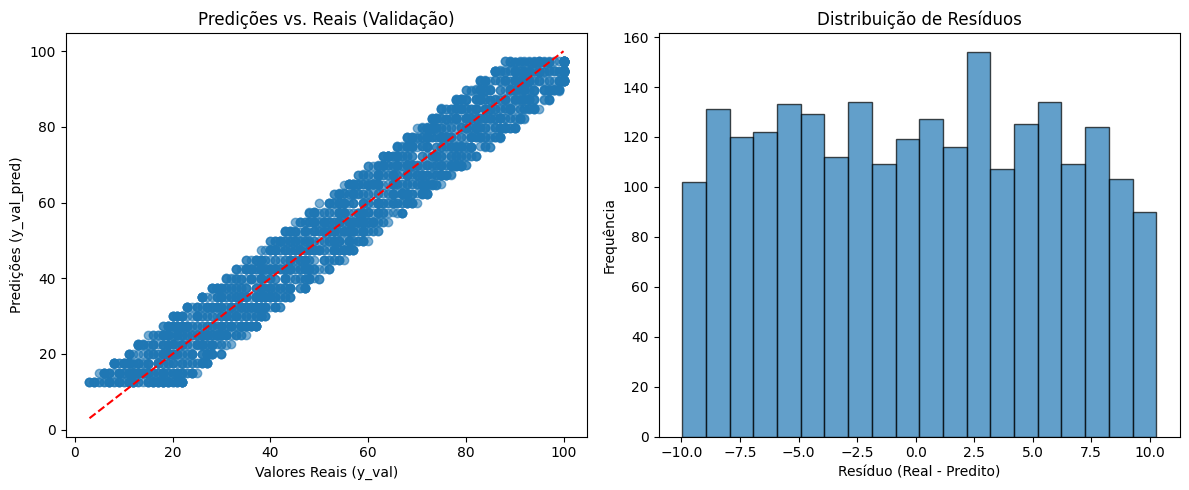

In [11]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title('Predições vs. Reais (Validação)')
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Predições (y_val_pred)')


residuos = y_val - y_val_pred
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Resíduos')
plt.xlabel('Resíduo (Real - Predito)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### A. Tabela de Métricas e Performance

| Métrica | Treino (60%) | Validação (20%) | Interpretação |
| :--- | :--- | :--- | :--- |
| **R² Score** | 0.9584 | 0.9514 | Indica a porcentagem da variação da nota explicada pelo modelo. |
| **RMSE** | 5.7153 | 5.7256 | Média dos erros na escala da variável Target (Pontuação). |
| **MAE** | 4.9289 | 4.9618 | O erro médio absoluto das predições, em pontos. |

**Interpretação:**

* **R² Score:** O valor de **0.9514** na Validação indica que o modelo explica **95.14%** da variação da nota final do aluno. **A performance é excelente.**
* **MAE (Erro Médio Absoluto):** O MAE de **4.96** pontos significa que, em média, a previsão do modelo está cerca de **5 pontos** acima ou abaixo da nota real do aluno.
* **RMSE (Erro Quadrático):** O valor do RMSE de **5.72** é ligeiramente maior que o MAE, penalizando os maiores erros de previsão.

### B. Análise de Overfitting (Balanceamento)

* **Diferença R² (Treino - Validação):** **-0.0010**
* **Conclusão:** Como a diferença entre o R² de Treino (0.9584) e Validação (0.9514) é de apenas **0.0010** (negativo, o que é ótimo), o modelo está **extremamente bem balanceado** e não apresenta overfitting significativo. O modelo generaliza excelentemente para dados que não viu.
* **Gráfico (Predições vs. Reais):** O scatter plot deve mostrar os pontos alinhados muito próximos à linha diagonal, confirmando a alta capacidade preditiva do modelo.

### C. Importância das Features (Top 3)

Com base nos coeficientes da Regressão Linear:

1.  **Horas\_Estudo\_Semana:** **25.121533** -> **A feature mais importante**, com impacto direto e forte na nota.
2.  **Horas\_por\_Idade:** **0.843855**
3.  **Idade:** **0.083533**

### D. Próximos Passos (Etapa 4)

O Modelo Baseline estabeleceu um alto padrão de performance (R² > 0.95). O objetivo na Etapa 4 será **tentar manter ou superar este $\text{R²}$** utilizando modelos mais complexos, como **Random Forest** ou **XGBoost**, além de explorar a otimização de hiperparâmetros (GridSearch) para buscar a melhor performance possível e confirmar se o modelo $\text{Linear}$ é o melhor para estes dados.